#  Student Habits vs Academic Performance

---

**Projektarbeit im Rahmen des Kurses "Erklärbare KI und Visualisierungen"**
**Name:** Mia Mainka
**Matrikelnummer:** 3047072

---

## Technische Rahmenbedingungen

Dieses Projekt wurde unter folgenden technischen Voraussetzungen erstellt:

- **Betriebssystem:** Windows 11 (64-Bit)
- **Python-Version:** 3.12.9
- **Entwicklungsumgebung (IDE):** JetBrains PyCharm

Vor der Ausführung dieses Notebooks müssen alle benötigten Bibliotheken installiert werden.
Verwenden Sie dazu die bereitgestellte Datei `requirements.txt`, innerhalb einer virtuellen Umgebung.

```bash
pip install -r requirements.txt




##  Inhaltsverzeichnis

- [Student Habits vs Academic Performance](#student-habits-vs-academic-performance)
  - [Technische Rahmenbedingungen](#technische-rahmenbedingungen)
  - [Einleitung](#einleitung)
    - [Übersicht der enthaltenen Merkmale](#übersicht-der-enthaltenen-merkmale)
    - [Synthetische Datengrundlage und methodische Einordnung](#synthetische-datengrundlage-und-methodische-einordnung)
    - [Limitationen für die Auswertung im Projektkontext](#limitationen-für-die-auswertung-im-projektkontext)
    - [Kontaktaufnahme zur Verifikation](#kontaktaufnahme-zur-verifikation)
    - [Zielsetzung und Forschungsfokus](#zielsetzung-und-forschungsfokus)




## Einleitung

Diese Projektarbeit beschäftigt sich mit der Frage, wie bestimmte Verhaltensgewohnheiten und Lebensumstände von Studierenden mit ihrer akademischen Leistung zusammenhängen. Grundlage der Analyse ist der Datensatz
**[Student Habits vs Academic Performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)**, bereitgestellt von Jayanta Naath auf Kaggle.

Der Datensatz enthält **1.000 synthetisch erzeugte Beobachtungen** mit je 16 Merkmalen, die studentische Alltagsgewohnheiten, Ressourcen und mentale Faktoren erfassen. Die Zielvariable ist die erreichte **Prüfungsnote** (`exam_score`), welche als kontinuierlicher Wert angegeben ist.

### Übersicht der enthaltenen Merkmale

- `student_id` – eindeutiger Bezeichner je Datensatz
- `age` – Alter der Studierenden
- `gender` – Geschlecht (Male/Female)
- `study_hours_per_day` – tägliche Lernzeit in Stunden
- `social_media_hours` – tägliche Nutzung sozialer Medien
- `netflix_hours` – tägliche Netflix-Nutzung
- `part_time_job` – Nebenjob (Yes/No)
- `attendance_percentage` – Anwesenheitsquote in Prozent
- `sleep_hours` – durchschnittliche Schlafdauer pro Nacht
- `diet_quality` – Qualität der Ernährung (Poor, Fair, Good)
- `exercise_frequency` – sportliche Aktivität pro Woche (in Tagen)
- `parental_education_level` – höchster Bildungsabschluss der Eltern
- `internet_quality` – subjektive Einschätzung der Internetverbindung (Poor/Average/Good)
- `mental_health_rating` – Bewertung der psychischen Gesundheit (Skala 1–10)
- `extracurricular_participation` – Teilnahme an außercurricularen Aktivitäten (Yes/No)
- `exam_score` – Prüfungsleistung (Zielgröße)

### Synthetische Datengrundlage und methodische Einordnung

Laut Angabe des Autors handelt es sich bei diesem Datensatz um vollständig **synthetisch erzeugte Daten**, die mithilfe der Python-Bibliotheken `numpy` und `pandas` generiert wurden. Die Werte beruhen auf **zufälligen Verteilungen** und wurden durch **logische Abhängigkeiten** miteinander verknüpft, um laut Beschreibung *„real-life scenarios“* zu imitieren:

> *“This dataset is synthetic, created using Python libraries (numpy, pandas) with random distributions and logical dependencies to mimic real-life scenarios.”*

Der genaue Aufbau dieser sogenannten „logical dependencies“ wird jedoch nicht näher erläutert. Es bleibt unklar, auf welchen realen Vorbildern diese Strukturen basieren – oder ob sie vollständig künstlich konstruiert wurden. Auch ist nicht ersichtlich, ob z.B. empirische Bildungsstudien oder statistische Referenzwerte für das Design herangezogen wurden. Diese Unbestimmtheit erschwert die methodische Rückverfolgbarkeit der erzeugten Muster.

### Limitationen für die Auswertung im Projektkontext

Aus der künstlichen Herkunft des Datensatzes ergeben sich mehrere Einschränkungen, die für die Interpretation der Analyseergebnisse zentral sind:

1. Die dargestellten Zusammenhänge spiegeln keine realen Daten wider, sondern resultieren aus der Auswahl der verwendeten Verteilungen und Regeln bei der Simulation.
2. Eine Übertragbarkeit auf reale Studierendenpopulationen ist methodisch nicht möglich, da keine empirische Validierung stattgefunden hat.
3. Die Analyseergebnisse können zwar interne Strukturen und Korrelationen im Datensatz aufdecken, dürfen jedoch **nicht als kausale oder evidenzbasierte Aussagen** interpretiert werden. Die gefundenen Muster gelten ausschließlich innerhalb des simulierten Rahmens.

Insbesondere der unklare Begriff „logical dependencies“ lässt offen, ob die beobachtbaren Beziehungen (z.B. zwischen Lernzeit und Prüfungsnote oder Social-Media-Konsum und mentaler Gesundheit) gezielt eingebaut wurden oder lediglich zufällig entstanden sind. Dadurch ist eine inhaltliche Bewertung der Ergebnisse nur mit großer methodischer Vorsicht möglich.

### Kontaktaufnahme zur Verifikation

Zur besseren Einschätzung des zugrundeliegenden Generierungsverfahrens wurde der Autor des Datensatzes per E-Mail kontaktiert. In der Anfrage wurde insbesondere um eine Erläuterung gebeten, wie die „realistischen Muster für Bildungspraxis“ konkret implementiert wurden. Zum Zeitpunkt der Dokumentation liegt noch keine Rückmeldung vor. Die methodische Herleitung bleibt daher vorerst unklar.

Im Rahmen dieser Projektarbeit wird der Datensatz dennoch genutzt, um Verfahren erklärbarer KI zu erproben und explorative Visualisierungen durchzuführen. Die Interpretation aller Ergebnisse erfolgt bewusst zurückhaltend und **innerhalb des Rahmens der angenommenen Datenlogik**.

### Zielsetzung und Forschungsfokus

Ziel dieses Projekts ist es zu untersuchen, welche Gewohnheiten, Verhaltensmuster und Merkmale im studentischen Alltag mit der akademischen Leistung gemessen an der Prüfungsnote (`exam_score`) zusammenhängen. Dabei stehen folgende Leitfragen im Mittelpunkt:

- Inwiefern wirken sich Variablen wie tägliche Lernzeit, Schlafdauer, Social-Media-Nutzung oder mentale Gesundheit auf die Prüfungsleistung aus?
- Welche Muster lassen sich bei Studierenden mit besonders hohen oder niedrigen Leistungen erkennen?
- Welche Merkmale zeigen sich – global betrachtet oder lokal an einzelnen Beispielen als besonders einflussreich für Modellentscheidungen?

Ziel der Analyse ist es, mithilfe maschineller Lernverfahren und Methoden der erklärbaren KI (XAI - Explainable Artificial Intelligence) relevante Zusammenhänge aufzudecken und zu visualisieren. Dabei wird besonderer Wert auf Transparenz und Nachvollziehbarkeit gelegt.

Das methodische Vorgehen orientiert sich an den Inhalten der begleitenden Vorlesung „Erklärbare KI und Visualisierungen“. Dabei kommen u.a. folgende Ansätze zum Einsatz:

- **Explorative Datenanalyse (EDA)** zur Aufdeckung grundlegender Strukturen, Verteilungen und Korrelationen im Datensatz.
- **Modellierung mit Regressionsverfahren** und ggf. komplexeren Algorithmen, um Zusammenhänge zwischen den Merkmalen und der Zielgröße zu quantifizieren.
- **Erklärbarkeit durch XAI-Methoden**, insbesondere:
  - **LIME (Local Interpretable Model-Agnostic Explanations)** zur lokalen Erklärung einzelner Vorhersagen,
  - **SHAP (SHapley Additive ExPlanations)** zur Bestimmung globaler Merkmalseinflüsse und Wechselwirkungen.
- **Visuelle Aufbereitung der Ergebnisse**, um auch nicht-technischen Zielgruppen nachvollziehbare Einsichten zu ermöglichen.

Die Analyseergebnisse werden stets im Kontext der synthetischen Natur des Datensatzes reflektiert und methodisch vorsichtig interpretiert.




---

# Überblick über die Merkmalsverteilungen

Bevor mit der Modellierung oder erklärenden Verfahren wie LIME oder SHAP begonnen werden kann, ist es wichtig zu verstehen, wie die einzelnen Merkmale im Datensatz verteilt sind. Die explorative Analyse (EDA) hilft dabei, ein erstes Gefühl für die Daten zu bekommen und mögliche Besonderheiten wie Ausreißer oder Schieflagen zu erkennen.

In diesem Abschnitt werden alle Merkmale aufgeteilt in **numerische** und **kategoriale** Variablen untersucht. Ziel ist es, zu sehen:
- wie sich die Werte innerhalb eines Merkmals verteilen
- ob sich Auffälligkeiten oder Muster zeigen
- welche Variablen später für eine Modellierung besonders interessant sein könnten.

Diese erste Analyse liefert wichtige Grundlagen für alle weiteren Schritte im Projekt.




## Verteilung der numerischen Merkmale

Numerische Merkmale sind kontinuierlich messbare Größen wie zum Beispiel Alter, tägliche Lernzeit oder Prüfungsleistung. In diesem Abschnitt wird die Verteilung aller numerischen Variablen dargestellt, um erste Muster zu erkennen.

Besonders interessant ist dabei:
- ob die Verteilung symmetrisch oder schief ist,
- ob es extreme Ausprägungen gibt,
- und wie stark die Streuung innerhalb eines Merkmals ausfällt.

Diese Erkenntnisse helfen später dabei, geeignete Modelle zu wählen und die Merkmale richtig vorzubereiten – z.B. ob eine Skalierung nötig ist oder ob sich ein Merkmal als erklärungsstark für die Zielgröße `exam_score` eignet.


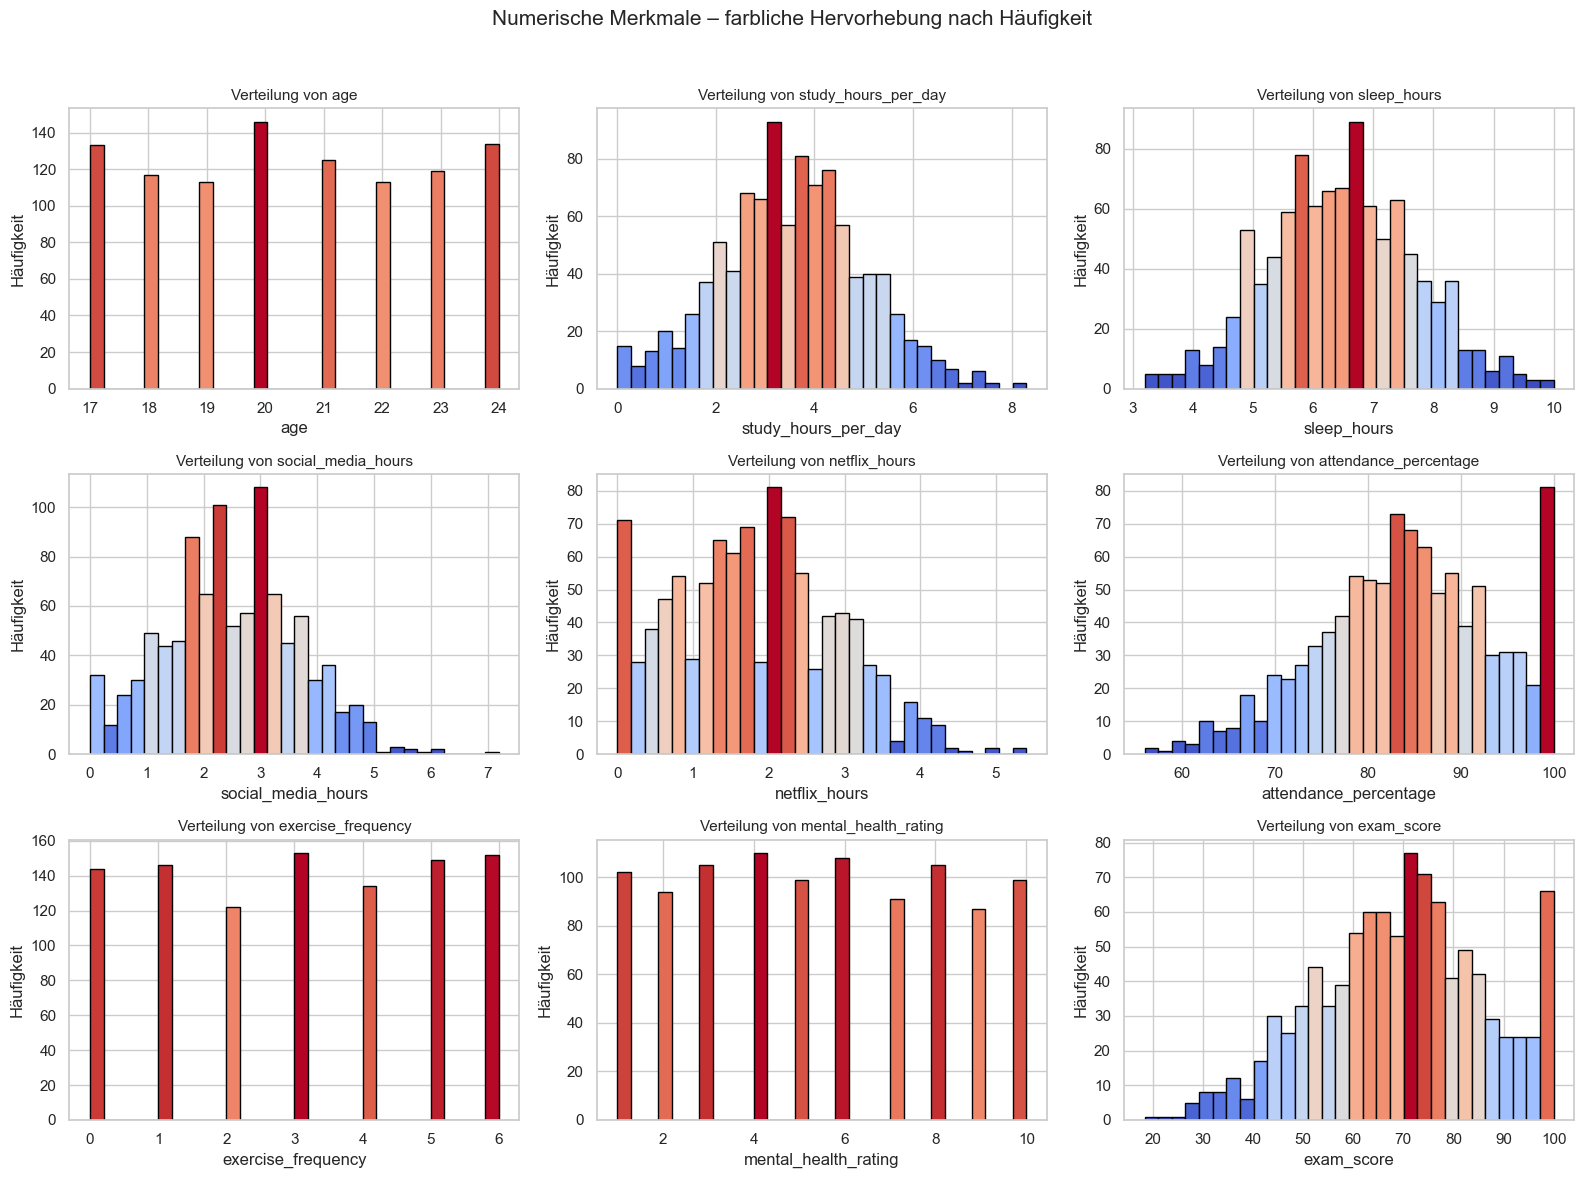

In [5]:
# Schritt 1: Bibliotheken importieren
import pandas as pd  # Für das Einlesen und Bearbeiten von Tabellen
import matplotlib.pyplot as plt  # Für die Erstellung von Plots
import seaborn as sns  # Für ansprechendes Plot-Design
import numpy as np  # Für numerische Berechnungen wie Histogramme

# Schritt 2: CSV-Datei einlesen
# Die Datei muss im Unterordner "data" liegen
df = pd.read_csv("data/student_habits_performance.csv")

# Schritt 3: Ungültige Werte bereinigen
# Altersangabe von 0 ist inhaltlich nicht plausibel und wird herausgefiltert
df_filtered = df[df["age"] > 0].copy()

# Schritt 4: Liste numerischer Merkmale definieren
# Diese Merkmale sollen als Histogramme dargestellt werden
numerical_features = [
    'age',
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'exercise_frequency',
    'mental_health_rating',
    'exam_score'
]

# Schritt 5: Plot-Stil und Layout definieren
sns.set(style="whitegrid")  # Heller Hintergrund mit Gitterlinien
plt.rcParams["figure.figsize"] = (16, 12)  # Gesamtgröße des Plots
fig, axes = plt.subplots(3, 3)  # 3x3-Raster für 9 Merkmale
axes = axes.flatten()  # Achsenarray flach machen für einfacheren Zugriff

# Schritt 6: Farbverlauf festlegen
# "coolwarm" verläuft von blau (niedrig) über weiß zu rot (hoch)
cmap = plt.get_cmap("coolwarm")

# Schritt 7: Plot für jedes Merkmal erzeugen
for i, feature in enumerate(numerical_features):
    # Histogramm berechnen: Zähle Werte pro Intervall (bin)
    counts, bins = np.histogram(df_filtered[feature], bins=30)

    # Bin-Mittelpunkte für die Platzierung der Balken berechnen
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Normierung: Häufigkeiten (counts) werden auf 0–1 skaliert für die Farbvergabe
    norm = plt.Normalize(vmin=min(counts), vmax=max(counts))

    # Farben zuweisen: Hohe Balken = warm (rot), niedrige = kühl (blau)
    colors = cmap(norm(counts))

    # Zeichne farbcodierte Balken
    axes[i].bar(
        bin_centers,  # Position auf der x-Achse (zentriert)
        counts,  # Höhe der Balken
        width=np.diff(bins),  # Breite der Balken
        align="center",  # Balken mittig über bin platzieren
        color=colors,  # Farbe abhängig von Häufigkeit
        edgecolor="black"  # Schwarze Kanten für bessere Lesbarkeit
    )

    # Titel und Achsenbeschriftung setzen
    axes[i].set_title(f"Verteilung von {feature}", fontsize=11)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Häufigkeit")

# Schritt 8: Gesamttitel und Layout anpassen
plt.suptitle("Numerische Merkmale – farbliche Hervorhebung nach Häufigkeit", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Beschreibung und Interpretation der Verteilungen numerischer Merkmale

In diesem Abschnitt wurden die wichtigsten numerischen Merkmale mithilfe von **Histogrammen** visualisiert. Ein Histogramm ist besonders geeignet, um die **Verteilung** einer kontinuierlichen Variable darzustellen, da es Häufigkeiten in bestimmten Wertebereichen (sogenannten Bins) zeigt. Die Histogramme wurden so eingefärbt, dass **häufig auftretende Werte rötlich** und **seltenere Werte bläulich** erscheinen. Das erleichtert das visuelle Erkennen von Schwerpunkten.

#### Vorgehensweise:
- Es wurden 30 Bins pro Variable definiert (also 30 Werteintervalle mit gleicher Breite).
- Nur eindeutig unplausible Werte wurden vorab bereinigt, etwa `age = 0`. Realistische Nullen, wie z.B. `netflix_hours = 0`, wurden beibehalten.
- Die Plots zeigen die Häufigkeitsverteilung aller neun numerischen Merkmale im Datensatz.

---

### Beobachtungen und Interpretationen:

- **Alter (`age`)**
  Die Werte konzentrieren sich zwischen 18 und 24 Jahren, mit einem Peak bei etwa 20. Das entspricht einer typischen Studierendenpopulation.

- **Tägliche Lernzeit (`study_hours_per_day`)**
  Die Verteilung ist leicht linksschief, mit einem deutlichen Peak zwischen 3 und 4 Stunden. Das ist plausibel für regulär Studierende.

- **Schlafdauer (`sleep_hours`)**
  Der Schwerpunkt liegt zwischen 6 und 7 Stunden – das ist unterhalb der allgemein empfohlenen 7 bis 9 Stunden. Auffällig ist, dass Schlafzeiten unter 6 Stunden relativ häufig vorkommen, was möglicherweise auf eine hohe Belastung oder ungesunde Routinen hinweist.

- **Social-Media-Nutzung (`social_media_hours`)**
  Die meisten Personen nutzen soziale Medien zwischen 2 und 4 Stunden täglich. Das liegt im erwartbaren Bereich, könnte aber je nach individueller Tagesplanung als hoch gewertet werden.

- **Netflix-Nutzung (`netflix_hours`)**
  Viele Einträge liegen bei 1–2 Stunden pro Tag. Es gibt jedoch auch eine erkennbare Anzahl mit `0` Stunden, was realistisch und im Datensatz belassen wurde.

- **Anwesenheitsquote (`attendance_percentage`)**
  Die Werte sind stark rechtsschief verteilt – mit einem Peak bei 100 %. Das könnte durch die Datensimulation bedingt sein und einen impliziten Zusammenhang mit Leistungsdaten nahelegen.

- **Sporthäufigkeit (`exercise_frequency`)**
  Fast alle Werte sind gleichmäßig über 0–6 Tage verteilt, mit leichtem Peak bei 3 Tagen. Eine klare Vorliebe für bestimmte Bewegungsmuster ist nicht erkennbar.

- **Mentale Gesundheit (`mental_health_rating`)**
  Die Werte verteilen sich relativ gleichmäßig auf die Skala von 1 bis 10, mit leichter Häufung im mittleren Bereich (5–7). Sehr niedrige Bewertungen (unter 3) kommen kaum vor.

- **Prüfungsnote (`exam_score`)**
  Die Noten sind zwischen 40 und 100 breit verteilt, mit einem Peak bei ca. 75 Punkten. Auffällig ist, dass extrem niedrige Werte fast nicht vorhanden sind – das könnte ein Indiz für eine Verzerrung in der Datenverteilung sein.

---

Diese erste Auswertung zeigt bereits wichtige Tendenzen im Datensatz, die im weiteren Projektverlauf berücksichtigt werden. Besonders die teilweise schiefen Verteilungen und die Peaks bei Extremwerten (z.B. 100 % Anwesenheit) sollten bei der Modellwahl und bei erklärenden Methoden wie LIME oder SHAP kritisch reflektiert werden.


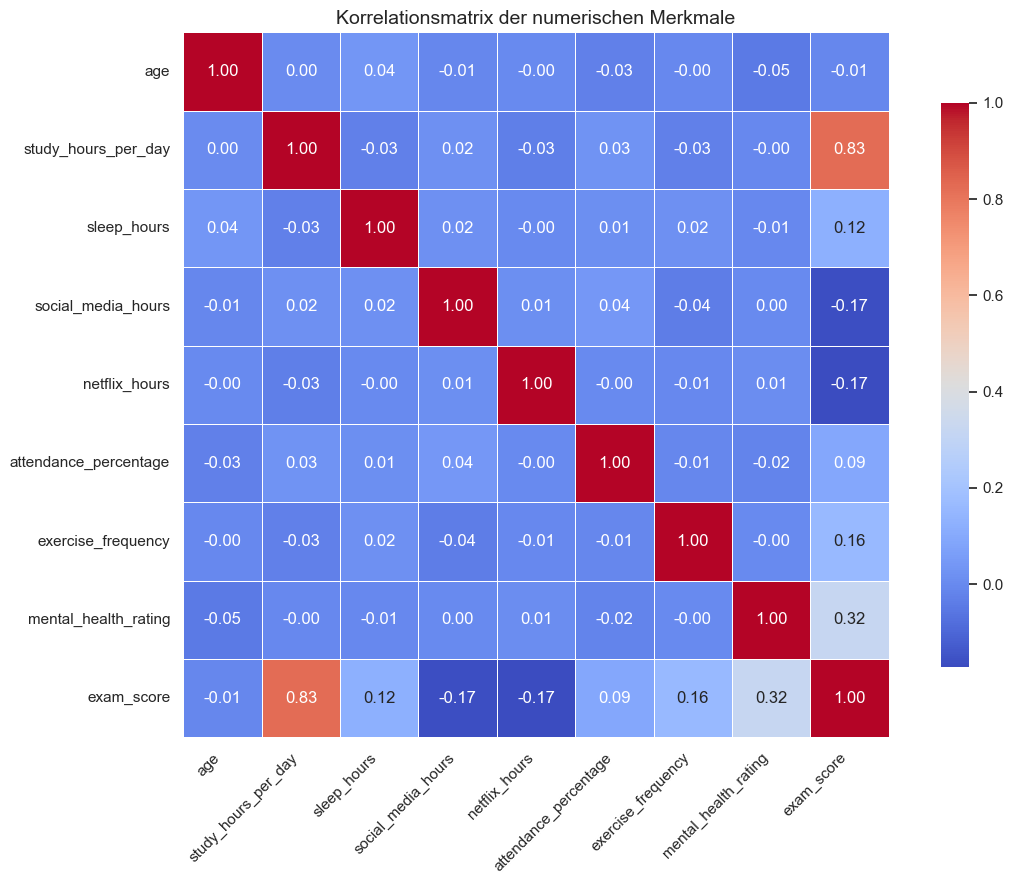

In [9]:
# Schritt 1: Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Schritt 2: Daten einlesen
# ACHTUNG: Passe ggf. den Pfad zur CSV-Datei an!
df = pd.read_csv("data/student_habits_performance.csv")

# Schritt 3: Unplausible Werte bereinigen (z. B. Alter = 0 ist nicht realistisch)
df = df[df["age"] > 0]

# Schritt 4: Liste der numerischen Merkmale (wie bereits in vorheriger Analyse definiert)
numerical_features = [
    'age',
    'study_hours_per_day',
    'sleep_hours',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'exercise_frequency',
    'mental_health_rating',
    'exam_score'
]

# Schritt 5: Korrelationsmatrix berechnen (nur für numerische Merkmale)
correlation_matrix = df[numerical_features].corr()

# Schritt 6: Plot-Stil und Größe definieren
sns.set(style="whitegrid")
plt.figure(figsize=(12, 9))

# Schritt 7: Heatmap erzeugen
sns.heatmap(
    correlation_matrix,
    annot=True,              # Korrelationswerte als Text anzeigen
    fmt=".2f",               # Format mit 2 Nachkommastellen
    cmap="coolwarm",         # Farbskala: Blau = negativ, Rot = positiv
    square=True,             # Zellen quadratisch
    linewidths=0.5,          # Linien zwischen Feldern
    cbar_kws={"shrink": .8}  # Farblegende verkleinern
)

# Schritt 8: Achsentitel und Layout anpassen
plt.title("Korrelationsmatrix der numerischen Merkmale", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Interpretation der Korrelationsmatrix

Um ein besseres Verständnis für die Zusammenhänge zwischen den numerischen Variablen im Datensatz zu gewinnen, wurde eine **Korrelationsmatrix** erstellt und als Heatmap visualisiert. Dabei wurde der Pearson-Korrelationskoeffizient berechnet, der angibt, wie stark zwei Variablen **linear** miteinander zusammenhängen.

Die Darstellung zeigt, in welchem Ausmaß sich zwei Merkmale gemeinsam verändern, also ob hohe Werte des einen Merkmals mit hohen (positiver Zusammenhang) oder niedrigen Werten (negativer Zusammenhang) des anderen Merkmals einhergehen. Die Farbskala reicht von **blau (negativ)** bis **rot (positiv)** und verdeutlicht die Stärke dieser Zusammenhänge auf einen Blick.

---

### Vorgehen und Ziel

Die Korrelationsanalyse wurde ausschließlich auf **numerische Merkmale** angewendet, da für kategoriale Merkmale andere Methoden wie z.B. Cramér’s V oder logistische Regressionsansätze besser geeignet sind.

Ziel dieser Darstellung ist es:
- frühe Hinweise auf **relevante Einflussfaktoren** für die Prüfungsleistung (`exam_score`) zu erkennen,
- **redundante Merkmale** zu identifizieren, die stark miteinander korreliert sein könnten,
- und eine Grundlage für die spätere Auswahl und Bewertung von Modellen und Erklärbarkeits-Methoden zu schaffen.

---

### Was ist auffällig?

Beim Durchsehen der Heatmap fallen mehrere interessante Punkte auf:

- **Starke Korrelation** zwischen `study_hours_per_day` und `exam_score` (**+0.83**):
  Diese Beziehung ist sehr deutlich und deckt sich mit der allgemeinen Erwartung, dass mehr tägliche Lernzeit zu besseren Prüfungsergebnissen führt. Es ist plausibel und unterstreicht die Bedeutung dieser Variable für spätere Modelle.

- **Moderate Korrelation** zwischen `mental_health_rating` und `exam_score` (**+0.32**):
  Auch hier zeigt sich ein nachvollziehbarer Zusammenhang: Studierende mit besser eingeschätztem mentalen Wohlbefinden scheinen tendenziell bessere Noten zu erreichen. Es wäre interessant, ob dieser Zusammenhang auch bei realen Daten bestehen bleibt.

- **Schwache negative Korrelationen** zwischen `social_media_hours`, `netflix_hours` und `exam_score` (jeweils **-0.17**):
  Diese deuten darauf hin, dass übermäßiger Konsum von Medieninhalten leicht negativ mit der Prüfungsleistung zusammenhängt. Ein häufig angenommener, aber hier nur schwach messbarer Effekt.

- **`age` ist mit fast keinem anderen Merkmal korreliert** (nahe 0):
  Das liegt daran, dass die Studierenden in der Stichprobe alle sehr ähnliche Altersangaben haben (zwischen 18 und 24 Jahren). Da wenig Varianz besteht, kann auch kaum eine lineare Beziehung zu anderen Merkmalen bestehen.

---

### Was lässt sich daraus schließen?

Die Analyse zeigt, dass **nicht alle Variablen gleichermaßen informativ** für die Zielgröße `exam_score` sind. Besonders `study_hours_per_day`, aber auch `mental_health_rating`, `exercise_frequency` und `attendance_percentage` liefern erste Hinweise auf potenziell relevante Prädiktoren.

Gleichzeitig ist klar:
Eine hohe oder niedrige Korrelation sagt noch nichts über Kausalität aus. Es könnte z.B. sein, dass gute Noten die Motivation zum Lernen erhöhen (statt umgekehrt) oder dass beide Effekte durch Dritte beeinflusst werden. Um diese Fragen zu klären, sind **modellspezifische Erklärungen** durch LIME oder SHAP notwendig, die im weiteren Verlauf des Notebooks erfolgen.

---

### Bewertung der Aussagekraft

Die Korrelationsmatrix ist ein **wertvoller erster Schritt**, um grobe Zusammenhänge zu erfassen. Sie hilft dabei:
- **Hypothesen zu formulieren**, die später geprüft werden können,
- die **Modellwahl gezielter** zu gestalten (z.B. Merkmalsauswahl),
- und **Redundanz zwischen Features** zu erkennen.

Jedoch muss betont werden, dass komplexe, nichtlineare Zusammenhänge hier **nicht sichtbar** sind. Diese erfordern weiterführende Visualisierungen und modellbasierte Analysen, wie sie im nächsten Schritt des Projekts folgen werden.
